<a href="https://colab.research.google.com/github/dtoniolo/Advanced-Machine-Learning-Project/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Tensorflow Import and GPU recognition
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3399246891670627875, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9159250580730072345
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9636329174791131645
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7283389320327616714
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/fruits.zip' -d /

Streaming output truncated to the last 5000 lines.
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: /fruits-360_dataset/fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: /fruits-360_dat

In [0]:
#Importing Keras and other useful libs
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from glob import glob
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [0]:
#Defining paths for my train,test,validation folders
train_path = '/Training'
test_path = '/Test'

In [0]:
#Defining dataset path and saving it for future usage
print(os.listdir('/fruits-360_dataset/fruits-360/'))
path = '/fruits-360_dataset/fruits-360'

['Test', 'test-multiple_fruits', 'papers', 'Training', 'LICENSE', 'readme.md']


In [0]:
#Number of pictures in Training folder
training_files = glob(os.path.join(path,'Training', '*/*.jpg'))
image_num = len(training_files)
print("Number of Images: ",image_num)

Number of Images:  60498


In [0]:
#Number of pictures in Test Folder
testing_files = glob(os.path.join(path, 'Test', '*/*.jpg'))
img_num = len(testing_files)
print("Number of Images: ", img_num)

Number of Images:  20622


In [0]:
#Print category details
image_count = []
class_names = []
print('{:18s}'.format('Class'), end='')
print('Count:')
print('-'*24)
for folder in os.listdir(os.path.join(path,'Training')):
  folder_count = len(os.listdir(os.path.join(path,'Training',folder)))
  image_count.append(folder_count)
  class_names.append(folder)
  print('{:20s}'.format(folder), end='')
  print(folder_count)
print('-'*24)
print('Number of Classes:', len(class_names))
print('Average number of images per Class: ', np.array(image_count).mean())

Class             Count:
------------------------
Apple Golden 1      492
Apple Red Yellow 1  492
Kohlrabi            471
Tomato Cherry Red   492
Avocado             427
Nut Pecan           178
Grape Blue          984
Peach               492
Chestnut            450
Cherry Wax Yellow   492
Potato Sweet        450
Grape White         490
Pear Monster        490
Plum 3              900
Pear Abate          490
Apple Granny Smith  492
Orange              479
Apple Braeburn      492
Pepper Yellow       666
Grape White 2       490
Quince              490
Peach 2             738
Onion Red Peeled    445
Tamarillo           490
Granadilla          490
Apricot             492
Kumquats            490
Apple Golden 2      492
Mango               490
Eggplant            468
Cantaloupe 2        492
Cherry 1            492
Avocado ripe        491
Pineapple           490
Tomato 4            479
Mulberry            492
Onion White         438
Cauliflower         702
Lemon Meyer         490
Tangelo       

In [0]:
#Function to plot Images
def plot_images_from_folders(directory):

  for i, folder in enumerate(os.listdir(directory)[0:5]):
    folder_name = folder
    fig = plt.figure(figsize=(12,12),dpi=100)
    for i, file in enumerate(os.listdir(os.path.join(directory,folder))[0:5]):
      fullpath = os.path.join(directory,folder,file)
      img = mpimg.imread(fullpath)
      plt.subplot(1,5,i+1)
      plt.imshow(img)    

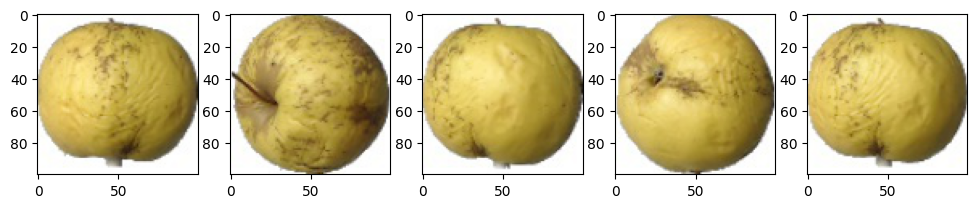

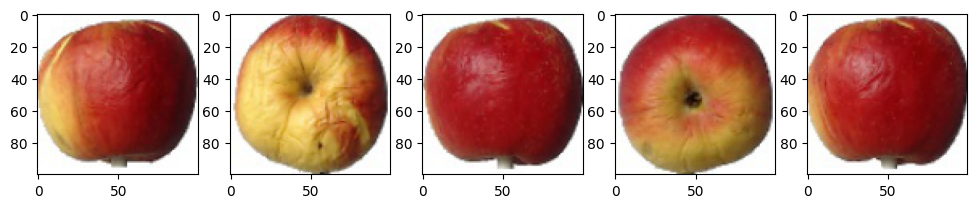

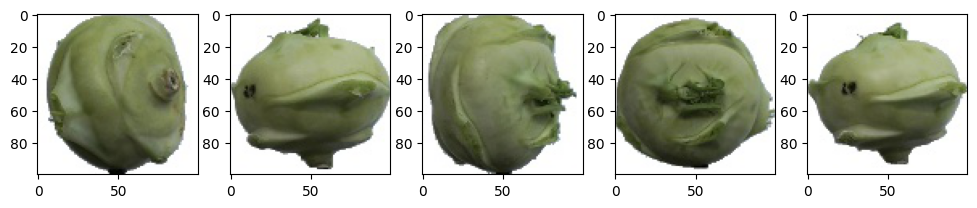

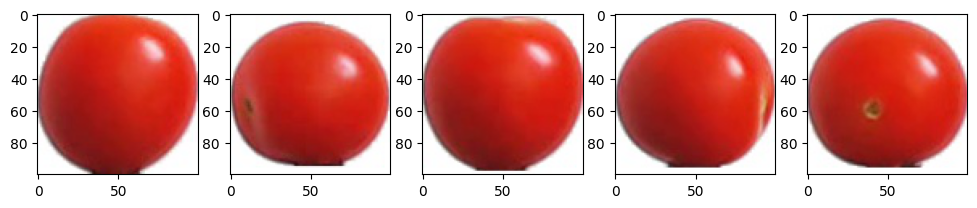

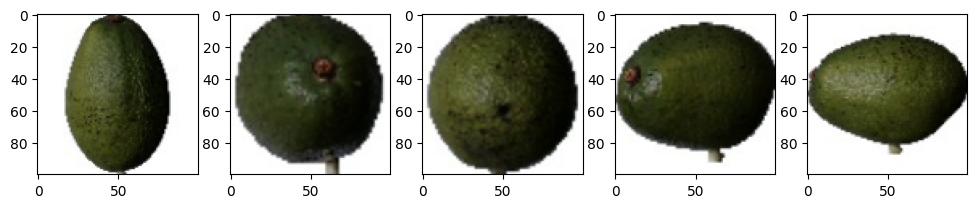

In [0]:
plot_images_from_folders(os.path.join(path,'Training'))

In [0]:
#Definitive paths
train_out_path = os.path.join(path,'Training')
test_out_path = os.path.join(path, 'Test')
print(train_out_path)
print(test_out_path)

/fruits-360_dataset/fruits-360/Training
/fruits-360_dataset/fruits-360/Test


In [0]:
#1 Approach: VGG16 pre-trained
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [0]:
#Implementing some augmentation to avoid overfitting on the training generator
train_datagenerator = ImageDataGenerator(rescale=1. / 255, rotation_range=30 ,zoom_range=0.2, horizontal_flip=True, preprocessing_function=preprocess_input)
test_datagenerator = ImageDataGenerator(rescale= 1./255, preprocessing_function=preprocess_input, validation_split=0.3)

In [0]:
#Creating Batches
train_batches = train_datagenerator.flow_from_directory(train_out_path, target_size=(224, 224), color_mode="rgb", class_mode="categorical" ,  batch_size=32)
val_batches = test_datagenerator.flow_from_directory(directory=test_out_path, target_size=(224, 224), color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='training')
test_batches = test_datagenerator.flow_from_directory(directory=test_out_path, target_size=(224, 224), color_mode="rgb", class_mode="categorical" ,  batch_size=32, shuffle=False, subset='validation')

Found 60498 images belonging to 120 classes.
Found 14495 images belonging to 120 classes.
Found 6127 images belonging to 120 classes.


In [0]:
#Plotting Classes Distribution for Training and Testing folder
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
init_notebook_mode(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

training_data = pd.DataFrame(train_batches.classes, columns=['classes'])
testing_data = pd.DataFrame(test_batches.classes, columns=['classes'])

def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

In [0]:
#Training Data Plot
configure_plotly_browser_state()
x1, y1 = create_stack_bar_data('classes', training_data)
x1 = list(train_batches.class_indices.keys())

trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Img per Class")
layout = dict(height=400, width=1000, title='Distribution in Training Data', legend=dict(orientation="h"), 
                yaxis = dict(title = 'Img per Class'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [0]:
#Test Data Plot
configure_plotly_browser_state()
x1, y1 = create_stack_bar_data('classes', testing_data)
x1 = list(test_batches.class_indices.keys())

trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Img per Class")
layout = dict(height=400, width=1000, title='Distribution in Testing Data', legend=dict(orientation="h"), 
                yaxis = dict(title = 'Img per Class'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [0]:
train_size=len(train_batches)
val_size=len(val_batches)
test_size=len(test_batches)

In [0]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=dc2bd2b26db970799df3a7e36a7e6051d71feaa2af367034dc958088021da9ee
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=26586ddad910be821fc75f673f8bb80be3faff35cb2c20ae492e55e1f6a8026b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
#Importing Model
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
vgg_16_model = applications.VGG16(input_tensor=None,include_top=False, weights='imagenet', input_shape=(224,224,3))
#Using pretrained
for layer in vgg_16_model.layers:
  layer.trainable=False
#Adding Layers at the top
top = vgg_16_model.output
top = Flatten()(top)
top = Dense(1024, activation='relu')(top)
top = Dropout(0.5)(top)
#Adding Classification layer with softmax activation function(needed for categorical predictions)
predictor = Dense(120 ,kernel_regularizer=regularizers.l2(0.0001),activation='softmax')(top)

vgg16_definitive = Model(inputs=vgg_16_model.input, outputs=predictor)


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
#Implementing HPO function to tune Hyperparameters of the model (learning rate,dropout)
def model_tuner(hp):
  base_model = applications.VGG16(input_tensor=None,include_top=False, weights='imagenet', input_shape=(224,224,3))
  for layer in base_model.layers:
    layer.trainable=False
  top = base_model.output
  top = Flatten()(top)
  top = Dense(1024, activation='relu')(top)
  top = Dropout(hp.Choice('rate',values=[0.2,0.3,0.4,0.5]))(top)
  predictor = Dense(120 ,kernel_regularizer=regularizers.l2(0.0001),activation='softmax')(top)
  vgg16_definitive = Model(inputs=base_model.input, outputs=predictor)
  vgg16_definitive.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4,1e-5])), loss='categorical_crossentropy',metrics=['accuracy'])
  return vgg16_definitive

tuner = RandomSearch(
    model_tuner,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1
    )

In [0]:
tuner.search_space_summary()

In [0]:
vgg16_definitive.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
#Compiling the model
vgg16_definitive.compile(optimizer=optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#Training and Validating the model: Round 1
wait = 1
epochs = 15
model_name='VGG_16'
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=wait)
checkpoint_callback = keras.callbacks.ModelCheckpoint(model_name+'.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [0]:
tuner.search(train_batches,
             epochs=15,verbose=1,
             validation_data=val_batches, callbacks=[early_stopping_callback,checkpoint_callback])

Epoch 1/15
1891/1891 [==============================] - ETA: 0s - loss: 0.9800 - accuracy: 0.7884
Epoch 00001: val_loss improved from inf to 0.29298, saving model to VGG_16.h5
1891/1891 [==============================] - 1060s 561ms/step - loss: 0.9800 - accuracy: 0.7884 - val_loss: 0.2930 - val_accuracy: 0.9364
Epoch 2/15
1891/1891 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9669
Epoch 00002: val_loss improved from 0.29298 to 0.17650, saving model to VGG_16.h5
1891/1891 [==============================] - 1054s 557ms/step - loss: 0.1612 - accuracy: 0.9669 - val_loss: 0.1765 - val_accuracy: 0.9527
Epoch 3/15
1891/1891 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9809
Epoch 00003: val_loss improved from 0.17650 to 0.11956, saving model to VGG_16.h5
1891/1891 [==============================] - 1060s 561ms/step - loss: 0.0904 - accuracy: 0.9809 - val_loss: 0.1196 - val_accuracy: 0.9734
Epoch 4/15
1891/1891 [============================

Epoch 1/15
1891/1891 [==============================] - ETA: 0s - loss: 1.1994 - accuracy: 0.7341
Epoch 00001: val_loss improved from inf to 0.35362, saving model to VGG_16.h5
1891/1891 [==============================] - 1061s 561ms/step - loss: 1.1994 - accuracy: 0.7341 - val_loss: 0.3536 - val_accuracy: 0.9200
Epoch 2/15
1891/1891 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9507
Epoch 00002: val_loss improved from 0.35362 to 0.17341, saving model to VGG_16.h5
1891/1891 [==============================] - 1056s 559ms/step - loss: 0.2230 - accuracy: 0.9507 - val_loss: 0.1734 - val_accuracy: 0.9585
Epoch 3/15
1891/1891 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9734
Epoch 00003: val_loss improved from 0.17341 to 0.13721, saving model to VGG_16.h5
1891/1891 [==============================] - 1060s 561ms/step - loss: 0.1212 - accuracy: 0.9734 - val_loss: 0.1372 - val_accuracy: 0.9665
Epoch 4/15
1891/1891 [============================

In [0]:
trainingMdl = vgg16_definitive.fit_generator(train_batches, epochs=15 , verbose=1, shuffle=True, validation_data=val_batches, callbacks=[early_stopping_callback,checkpoint_callback])

Epoch 1/15
1891/1891 [==============================] - 1032s 546ms/step - loss: 2.8727 - accuracy: 0.4187 - val_loss: 1.9955 - val_accuracy: 0.7462

Epoch 00001: val_loss improved from inf to 1.99552, saving model to VGG_16.h5
Epoch 2/15
1891/1891 [==============================] - 1010s 534ms/step - loss: 1.1840 - accuracy: 0.7697 - val_loss: 1.0366 - val_accuracy: 0.8642

Epoch 00002: val_loss improved from 1.99552 to 1.03660, saving model to VGG_16.h5
Epoch 3/15
1891/1891 [==============================] - 1011s 535ms/step - loss: 0.6715 - accuracy: 0.8764 - val_loss: 0.7276 - val_accuracy: 0.8927

Epoch 00003: val_loss improved from 1.03660 to 0.72756, saving model to VGG_16.h5
Epoch 4/15
1891/1891 [==============================] - 1017s 538ms/step - loss: 0.4354 - accuracy: 0.9246 - val_loss: 0.3461 - val_accuracy: 0.9283

Epoch 00004: val_loss improved from 0.72756 to 0.34606, saving model to VGG_16.h5
Epoch 5/15
1891/1891 [==============================] - 1001s 529ms/step - l

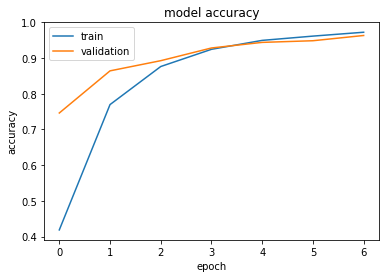

In [0]:
#Accuracy Plot
plt.plot(trainingMdl.history['accuracy'])
plt.plot(trainingMdl.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

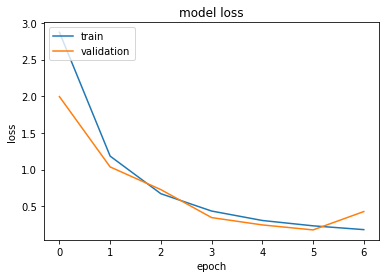

In [0]:
#Loss Plot
plt.plot(trainingMdl.history['loss'])
plt.plot(trainingMdl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
#Predictions
predictionModel = tf.keras.models.load_model('VGG_16.h5')
predictions, labels = [] , []
test_steps = test_batches.n // 32

for i in range(test_steps):
  img, classes = test_batches.next()
  classes = np.argmax(classes, axis=1)
  pred = np.argmax(predictionModel.predict(img), axis=1)
  predictions.extend(pred.astype('int32'))
  labels.extend(classes.astype('int32'))

labels = np.array(labels)
predictions = np.array(predictions)

print('First 25 results:')
print('  - Actuals    : ', labels[:25])
print('  - Predictions: ', predictions[:25])
correct_pred_count = (labels == predictions).sum()
test_acc = correct_pred_count / len(labels)
print('We got %d of %d correct (or %.3f accuracy)' % (correct_pred_count, len(labels), test_acc))

First 25 results:
  - Actuals    :  [119 119 119 119 119 119 119 119 119 119 119 119 119 119 119   0   0   0
   0   0   0   0   0   0   0]
  - Predictions:  [119 119 119 119 119 119 119 119 119 119 119 119 119 119 119   0   0   0
   0   0   0   0   0   0   0]
We got 6055 of 6095 correct (or 0.993 accuracy)


In [0]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mtx = confusion_matrix(labels, predictions)

In [0]:
print(conf_mtx)

[[49  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 48 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  0  0 ...  0  0 42]]


In [0]:
#Function for plotting Custom Confusion Matrix
from google.colab import files
import itertools
def plot_cm(conf_mtx, labels, normalize=False, cmap=plt.cm.Reds):
  if normalize:
    conf_mtx = conf_mtx.astype('float') / conf_mtx.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix")
  
  print(conf_mtx)

  leftmargin = 0.5 # inches
  rightmargin = 0.5 # inches
  categorysize = 0.5 # inches
  figwidth = leftmargin + rightmargin + (len(labels) * categorysize)

  f = plt.figure(figsize=(figwidth,figwidth))

  ax = f.add_subplot(111)
  ax.set_aspect(1)
  f.subplots_adjust(left=leftmargin/figwidth, right=1-rightmargin/figwidth, top=0.94, bottom=0.1)

  res = ax.imshow(conf_mtx, interpolation='nearest', cmap=cmap)

  plt.title("Confusion Matrix")
  plt.colorbar(res)
  ax.set_xticks(range(len(labels)))
  ax.set_yticks(range(len(labels)))
  ax.set_xticklabels(labels, rotation=45, ha='right')
  ax.set_yticklabels(labels)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mtx.max() / 2.
  for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
    plt.text(j, i, format(conf_mtx[i, j], fmt),
    horizontalalignment="center",
    color="white" if conf_mtx[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig("confusion_matrixVGG16.png")



Confusion Matrix
[[49  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 48 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  0  0 ...  0  0 42]]


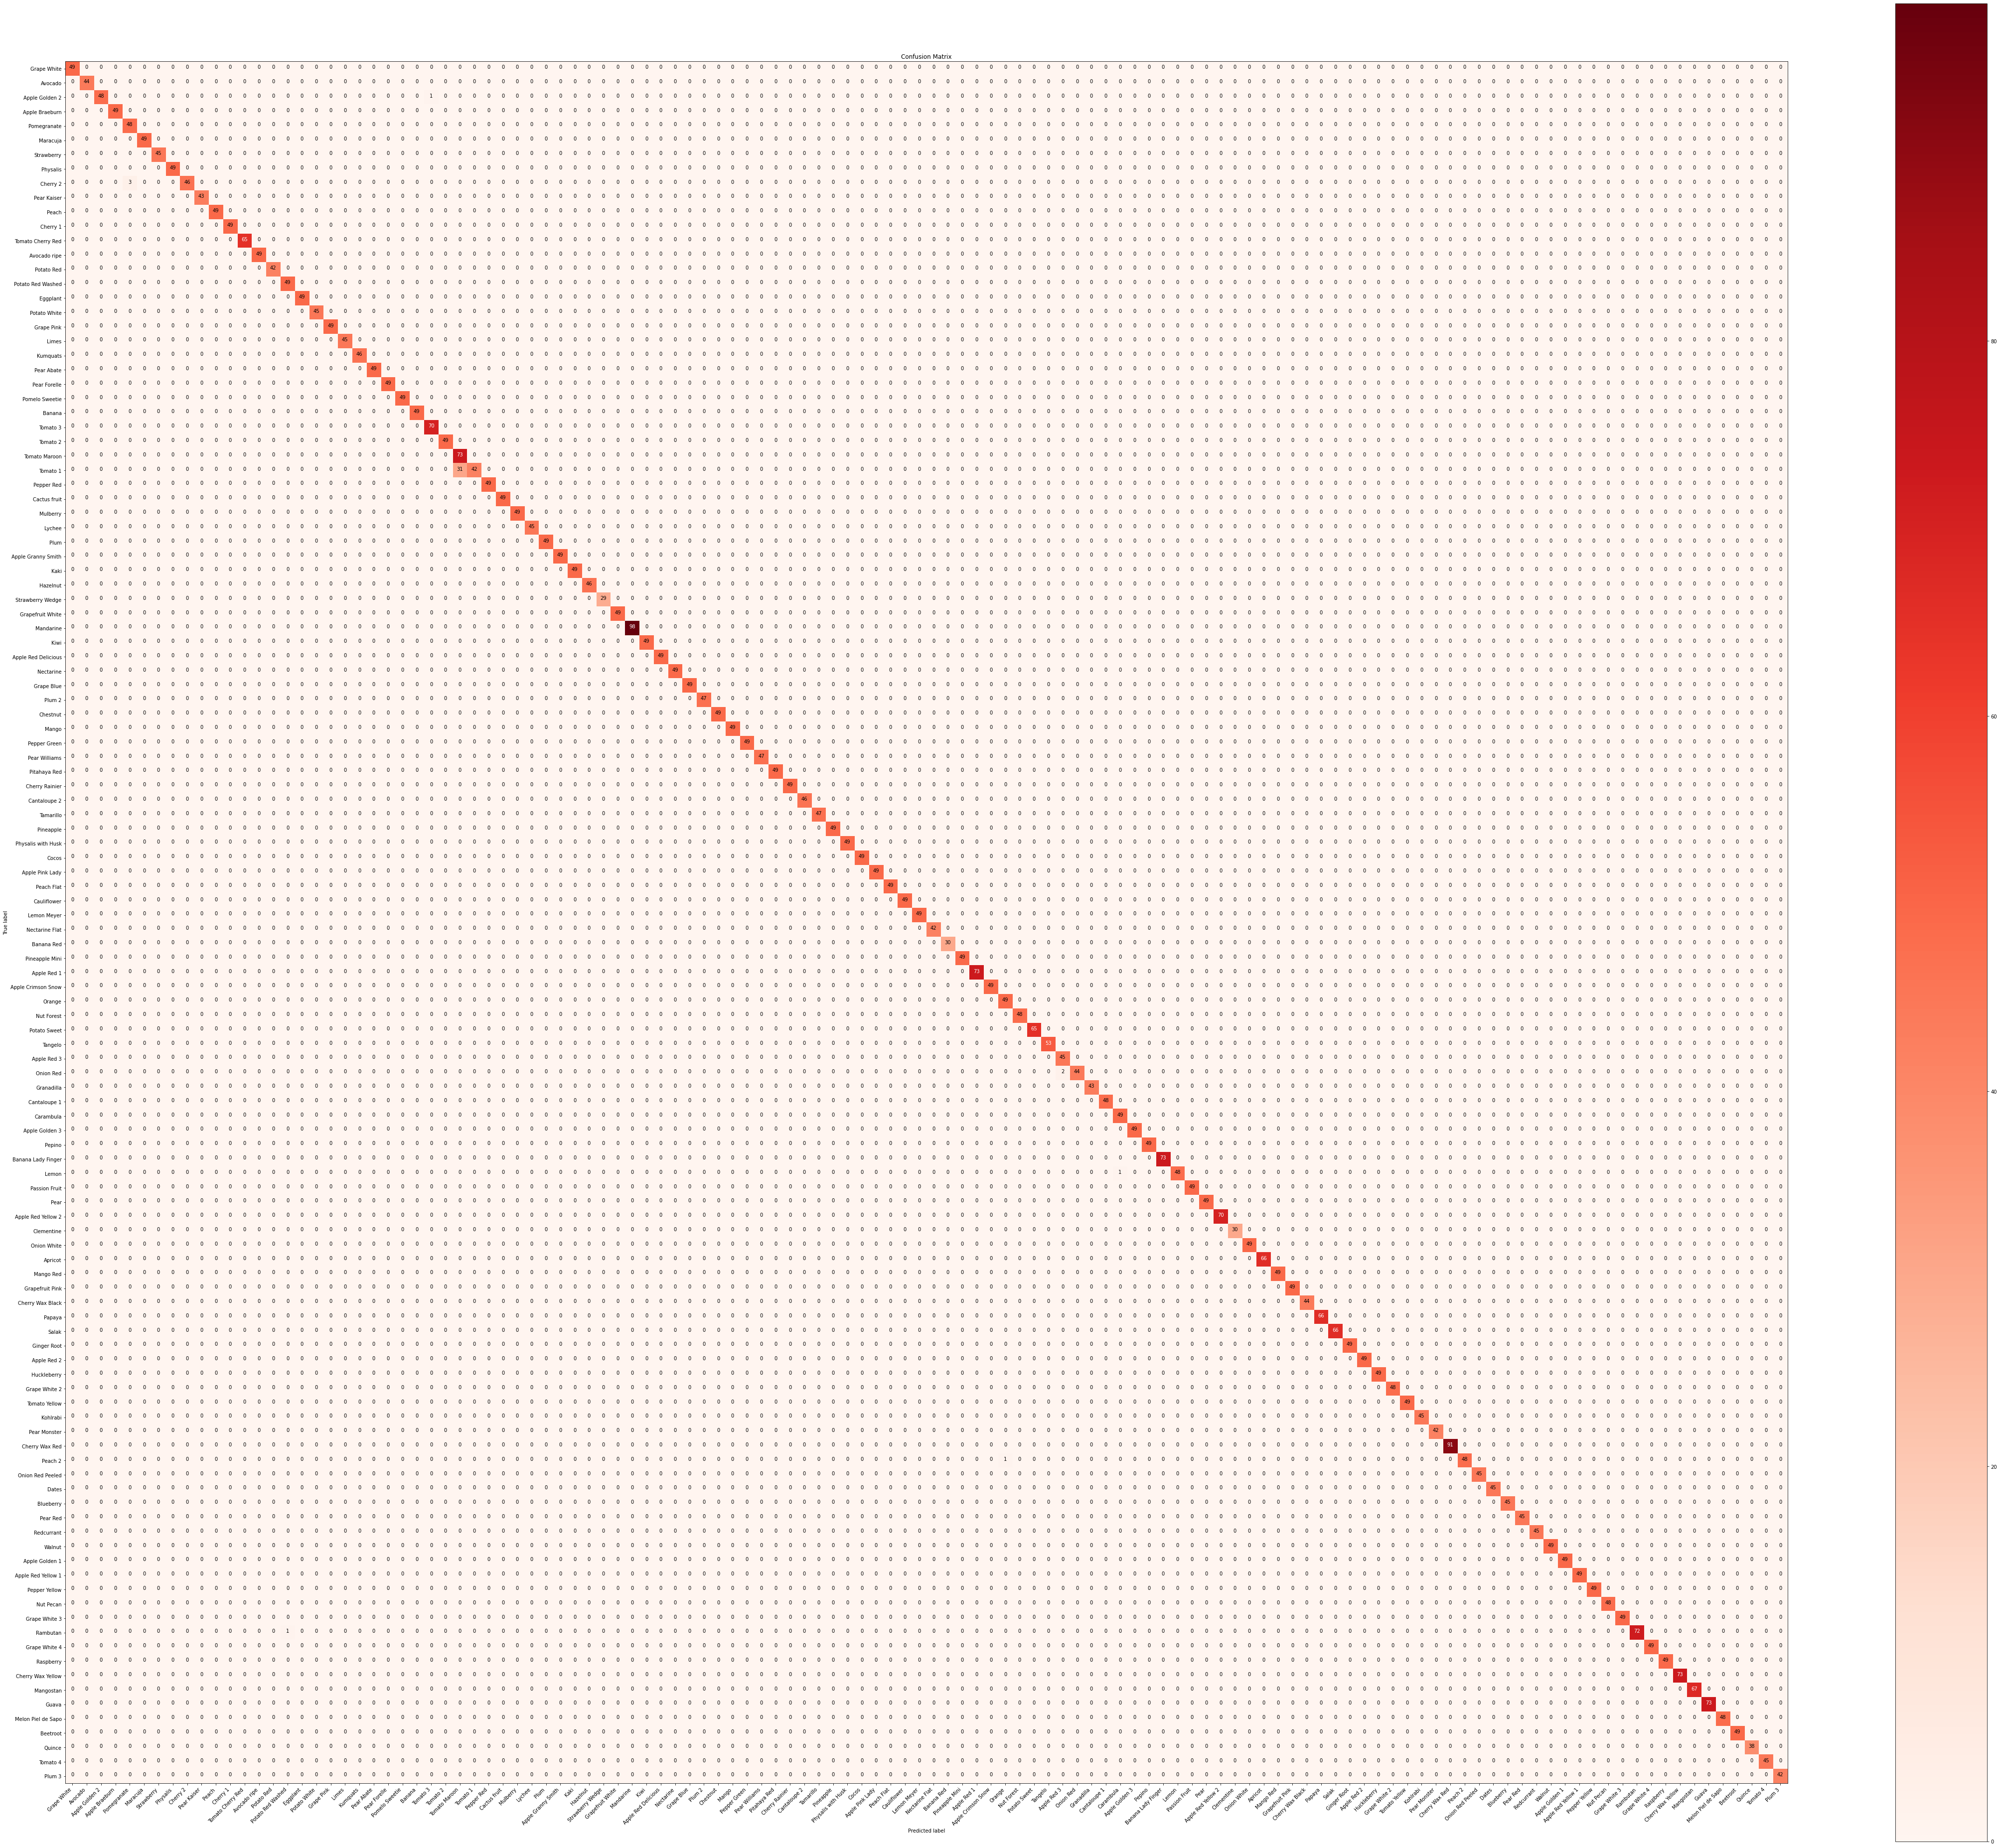

In [0]:
#plotting Confusion Matrix
plot_cm(conf_mtx, class_names)